In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [5]:
pd.options.display.float_format='{:20.2f}'.format
pd.set_option('display.max_columns',999)

#Data Exploration

In [6]:
df=pd.read_excel(r"/content/online_retail_II.xlsx",sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [7]:
df.shape

(525461, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Observations- CustomerID has a lot of entries which seem to be null. This must be taken care of.

In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [10]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [11]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [12]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [13]:
df["Invoice"]=df["Invoice"].astype('str')
df[df["Invoice"].str.match("^\\d{6}")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [14]:
df['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [15]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [16]:
df["StockCode"]=df["StockCode"].astype("str")
df["StockCode"]

,StockCode
0,85048
1,79323P
2,79323W
3,22041
4,21232
...,...
525456,22271
525457,22750
525458,22751
525459,20970


In [18]:
df[(df["StockCode"].str.match("^\\d{5}$")==False)
& (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [19]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


#Data Cleaning

In [20]:
cleaned_df=df.copy()



In [21]:
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype("str")
mask=(cleaned_df["Invoice"].str.match("^\\d{6}")==True)
cleaned_df=cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


Filtered out all invoices which do not have 6 numbers from start

In [22]:
cleaned_df["StockCode"]=cleaned_df["StockCode"].astype("str")
mask=((cleaned_df["StockCode"].str.match("^\\d{6}$")==True)
      | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
      |(cleaned_df["StockCode"].str.match("^PADS$")==True)

)
cleaned_df=cleaned_df[mask]
cleaned_df

<ipython-input-22-9eb886b87e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"]=cleaned_df["StockCode"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


5 Digits long, followed by letter, or has PAD stock code are included

In [23]:
cleaned_df.dropna(subset={"Customer ID"},inplace=True)

<ipython-input-23-b3b853a2f9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset={"Customer ID"},inplace=True)


In [24]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,55408.00,55408,55408.00,55408.00
mean,13.11,2010-06-04 05:31:02.086702336,3.07,15458.23
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-02-24 10:05:00,1.25,14084.75
50%,4.00,2010-05-30 12:46:00,2.55,15483.00
75%,12.00,2010-09-23 12:25:00,3.75,16946.00
max,6696.00,2010-12-09 20:01:00,129.95,18287.00
std,74.63,NaN,3.27,1669.56


Can notice that there exists quantity in negative and price has minimum val of 0.




In [25]:
cleaned_df[cleaned_df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
358820,524181,46000M,POLYESTER FILLER PAD 45x45cm,648,2010-09-27 16:59:00,0.00,17450.00,United Kingdom


In [26]:
cleaned_df=cleaned_df[cleaned_df['Price']>0]

In [27]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,55407.00,55407,55407.00,55407.00
mean,13.09,2010-06-04 05:28:02.014185984,3.07,15458.19
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-02-24 10:00:00,1.25,14084.50
50%,4.00,2010-05-30 12:44:00,2.55,15483.00
75%,12.00,2010-09-23 12:25:00,3.75,16945.50
max,6696.00,2010-12-09 20:01:00,129.95,18287.00
std,74.58,NaN,3.27,1669.55


In [28]:
cleaned_df['Price'].min()

0.001

In [29]:
len(cleaned_df)/len(df)

0.10544455249771154

In [30]:
cleaned_df.shape

(55407, 8)

Feature Engineering




In [31]:
cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"]*cleaned_df['Price']
cleaned_df

<ipython-input-31-4469e976513f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"]*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom,59.50
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom,55.80
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom,10.00
...,...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom,7.50
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom,7.50
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom,9.90
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom,1.95


Note: Prices are all in sterling.

In [32]:
aggregrated_df=cleaned_df.groupby(by="Customer ID",as_index=False).agg(MonetaryValue=("SalesLineTotal","sum"),
                                                                       Frequency=("Invoice","nunique"),
                                                                       LastInvoiceDate=("InvoiceDate","max"))
aggregrated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,25.34,2,2010-06-28 13:53:00
1,12347.00,356.45,2,2010-12-07 14:57:00
2,12349.00,274.50,2,2010-10-28 08:23:00
3,12352.00,11.40,1,2010-11-29 10:07:00
4,12355.00,158.80,1,2010-05-21 11:59:00


In [33]:
max_invoice_date= aggregrated_df["LastInvoiceDate"].max()
aggregrated_df["Recency"]=(max_invoice_date-aggregrated_df["LastInvoiceDate"]).dt.days
aggregrated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,25.34,2,2010-06-28 13:53:00,164
1,12347.00,356.45,2,2010-12-07 14:57:00,2
2,12349.00,274.50,2,2010-10-28 08:23:00,42
3,12352.00,11.40,1,2010-11-29 10:07:00,10
4,12355.00,158.80,1,2010-05-21 11:59:00,202


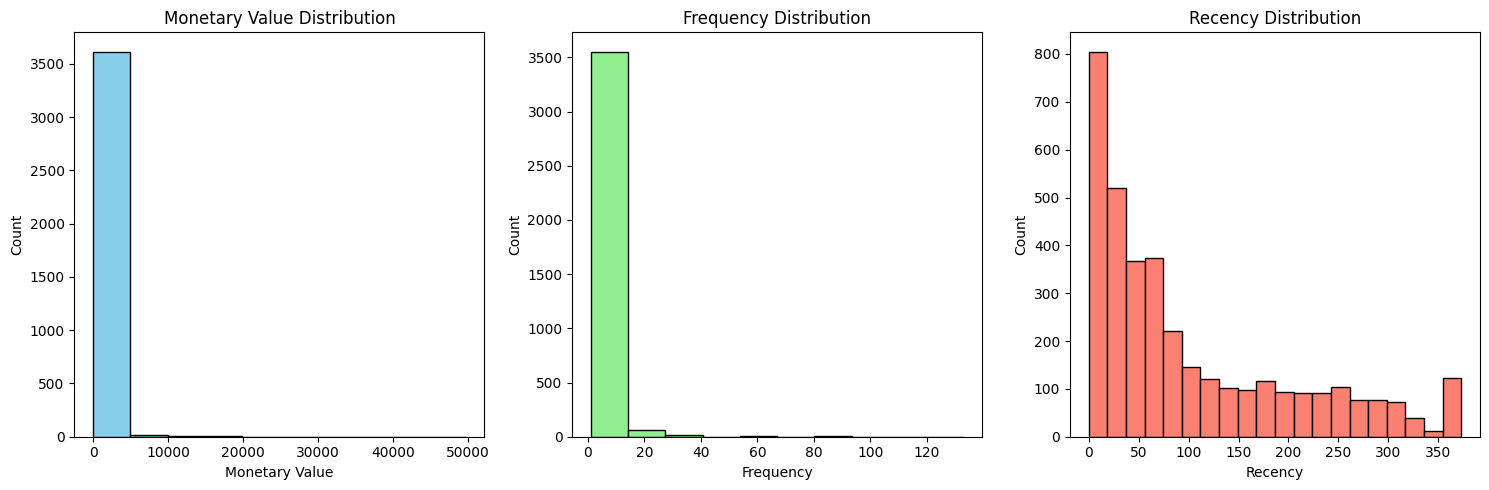

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(aggregrated_df['MonetaryValue'],bins=10,color='skyblue',edgecolor='black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregrated_df['Frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregrated_df['Recency'],bins=20,color='salmon',edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.tight_layout()

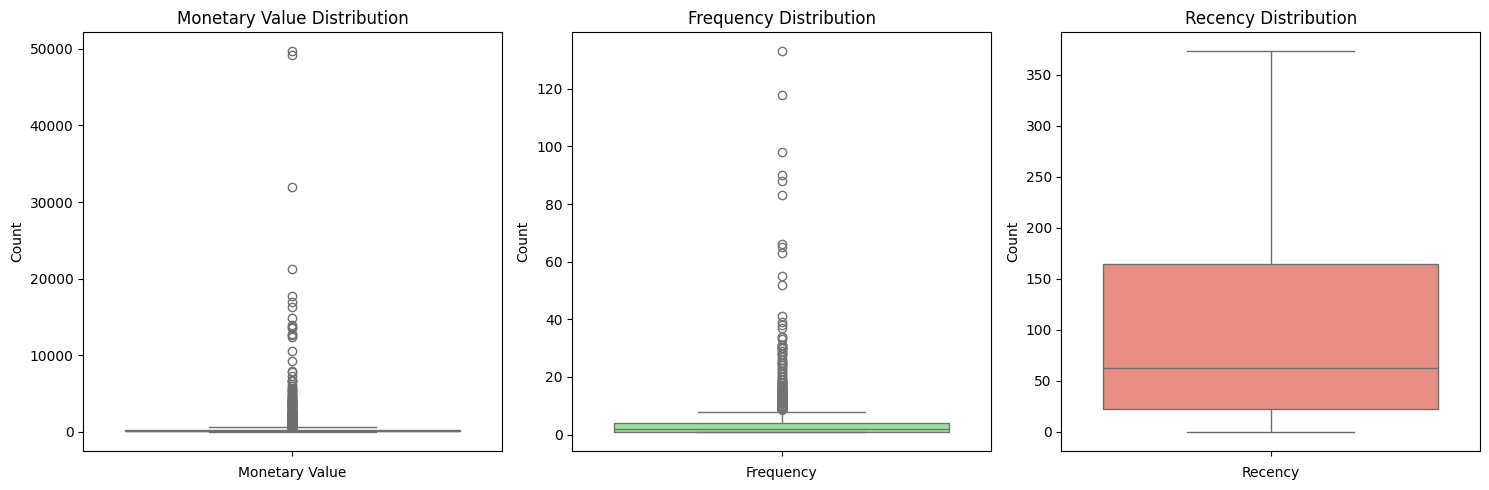

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(aggregrated_df['MonetaryValue'],color='skyblue')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(aggregrated_df['Frequency'],color='lightgreen')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(aggregrated_df['Recency'],color='salmon')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.tight_layout()

Too many outliers in monetary value and frequency

In [36]:
Mone_Q1=aggregrated_df["MonetaryValue"].quantile(0.25)
Mone_Q3=aggregrated_df["MonetaryValue"].quantile(0.75)

Mone_IQR=Mone_Q3-Mone_Q1
monetary_outliers_df=aggregrated_df[(aggregrated_df["MonetaryValue"]>(Mone_Q3+Mone_IQR*1.5))|(aggregrated_df["MonetaryValue"]<(Mone_Q1- 1.5*Mone_IQR))].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,398.00,398.00,398.00,398,398.00
mean,15300.25,2264.05,11.83,2010-10-21 12:44:24.422110464,49.02
min,12356.00,593.81,1.00,2010-01-12 11:34:00,0.00
25%,13870.25,749.05,5.00,2010-10-07 23:14:15,8.00
50%,15286.00,992.08,8.00,2010-11-18 13:44:30,21.00
75%,16752.75,1827.06,12.00,2010-12-01 13:59:00,62.75
max,18287.00,49678.55,133.00,2010-12-09 18:09:00,331.00
std,1714.19,4555.74,14.58,NaN,66.07


In [37]:
Fre_Q1=aggregrated_df["Frequency"].quantile(0.25)
Fre_Q3=aggregrated_df["Frequency"].quantile(0.75)

Fre_IQR=Fre_Q3-Fre_Q1
frequency_outliers_df=aggregrated_df[(aggregrated_df["Frequency"]>(Fre_Q3+Fre_IQR*1.5))|(aggregrated_df["Frequency"]<(Fre_Q1- 1.5*Fre_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,270.00,270.00,270.00,270,270.00
mean,15397.45,2464.28,16.92,2010-11-17 13:51:00.222222080,21.98
min,12417.00,87.16,9.00,2010-05-25 11:07:00,0.00
25%,14006.75,526.63,10.00,2010-11-14 11:54:15,3.25
50%,15505.50,910.03,12.00,2010-11-28 14:34:00,11.00
75%,16865.75,2021.97,16.00,2010-12-06 04:37:30,25.00
max,18260.00,49678.55,133.00,2010-12-09 19:32:00,198.00
std,1700.61,5433.04,15.90,NaN,31.55


In [38]:
non_outliers_df=aggregrated_df[(~aggregrated_df.index.isin(monetary_outliers_df.index)) &(~aggregrated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3167.00,3167.00,3167.00,3167,3167.00
mean,15370.69,125.92,2.35,2010-08-20 11:08:26.220397824,111.09
min,12346.00,0.38,1.00,2009-12-01 10:49:00,0.00
25%,13928.00,33.87,1.00,2010-06-10 16:55:00,29.00
50%,15370.00,78.58,2.00,2010-10-01 10:24:00,69.00
75%,16839.50,171.86,3.00,2010-11-10 16:48:00,182.00
max,18286.00,588.08,8.00,2010-12-09 20:01:00,373.00
std,1688.94,127.11,1.72,NaN,103.73


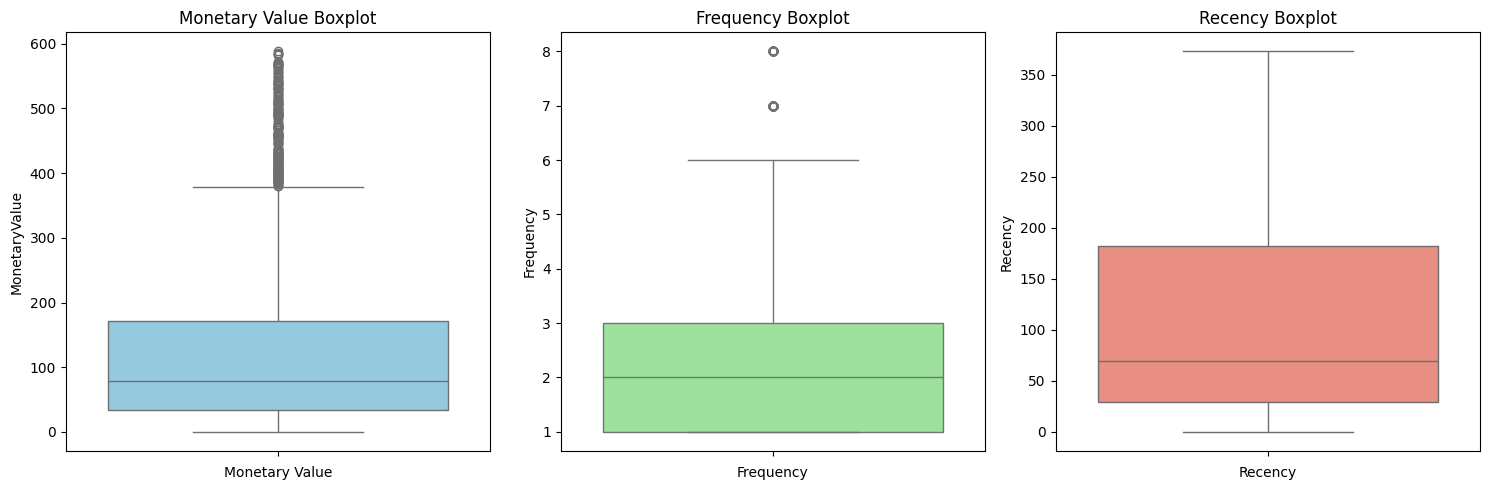

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

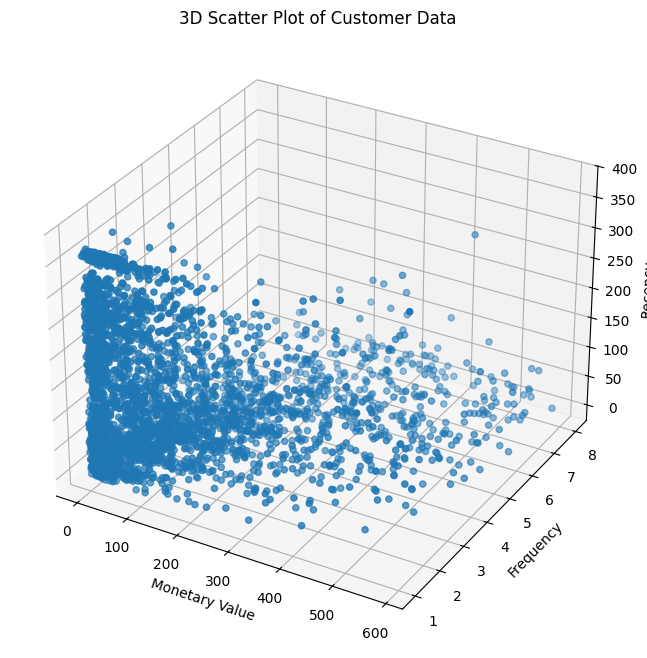

In [40]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])
ax.set_xlabel('Monetary Value')
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")

We observe that the scales of each axis is quite different.
So we apply Standard Scaling

In [41]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])
scaled_data

array([[-7.91426824e-01, -2.05333441e-01,  5.10151618e-01],
       [ 1.81390413e+00, -2.05333441e-01, -1.05177596e+00],
       [ 1.16908256e+00, -2.05333441e-01, -6.66114830e-01],
       ...,
       [-8.30297093e-01, -7.86469283e-01, -4.34718151e-01],
       [-8.65705234e-01, -7.86469283e-01,  1.77319182e+00],
       [ 1.35501464e+00, -2.05333441e-01, -8.49379976e-04]])

In [42]:
scaled_data_df=pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=("MonetaryValues","Frequency","Recency")  )
scaled_data_df

,MonetaryValues,Frequency,Recency
0,-0.79,-0.21,0.51
1,1.81,-0.21,-1.05
2,1.17,-0.21,-0.67
3,-0.90,-0.79,-0.97
4,0.26,-0.79,0.88
...,...,...,...
3639,-0.81,-0.79,0.97
3640,-0.37,0.96,-0.91
3641,-0.83,-0.79,-0.43
3642,-0.87,-0.79,1.77


Now we can create  a chart

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

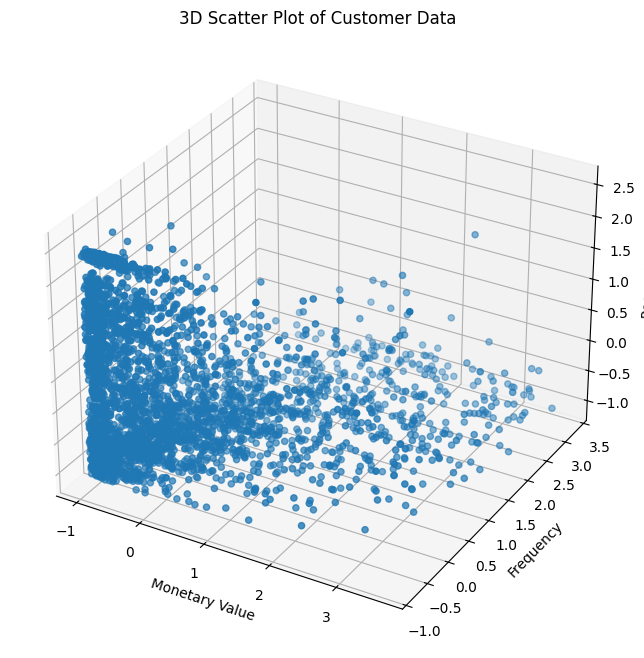

In [43]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(scaled_data_df["MonetaryValues"],scaled_data_df["Frequency"],scaled_data_df["Recency"])
ax.set_xlabel('Monetary Value')
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")

#KMeans Clustering

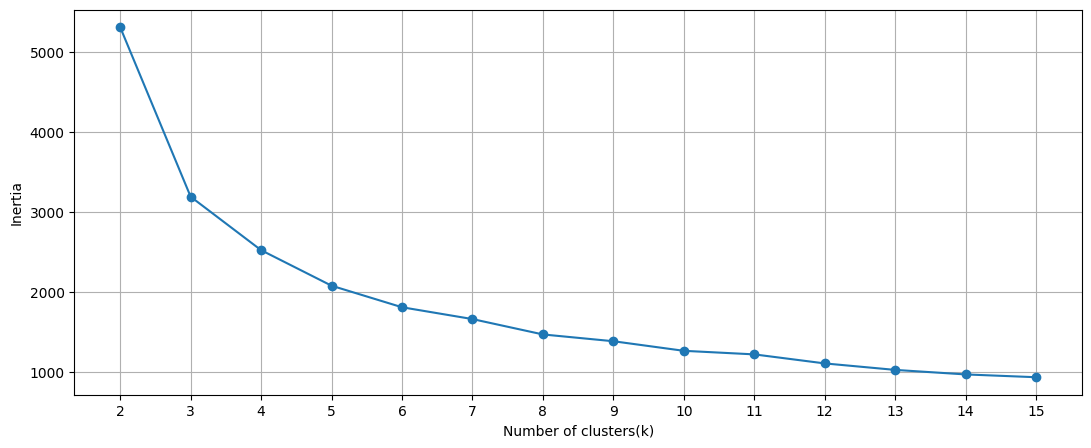

In [44]:
max_k=15

inertia=[]  #Saves all inertia value per iteration
k_values=range(2,max_k+1)
for k in k_values:
  kmeans=KMeans(n_clusters=k ,random_state=0,max_iter=1000)
  kmeans.fit_predict(scaled_data_df)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(13,5))
plt.plot(k_values,inertia,marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

To find optimal k value, can also use silhouette score

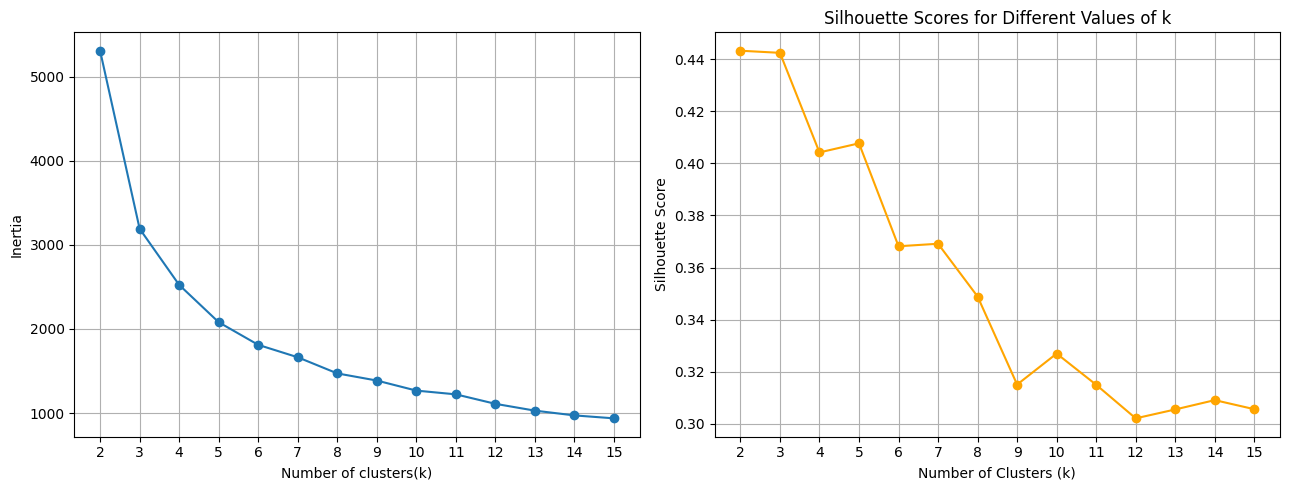

In [45]:
max_k=15

inertia=[]  #Saves all inertia value per iteration
silhouette_scores=[]
k_values=range(2,max_k+1)
for k in k_values:
  kmeans=KMeans(n_clusters=k ,random_state=0,max_iter=1000)

  cluster_labels=kmeans.fit_predict(scaled_data_df)

  silho_score=silhouette_score(scaled_data_df,cluster_labels)
  silhouette_scores.append(silho_score)


  inertia.append(kmeans.inertia_)
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Will use K=6 as silhoette_score and inertia are lower compared to other values of K

In [46]:
kmeans=KMeans(n_clusters=6,random_state=0,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([5, 1, 1, ..., 0, 3, 1], dtype=int32)

In [47]:
non_outliers_df["Clusters"]=cluster_labels
non_outliers_df

<ipython-input-47-f402638d5f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Clusters"]=cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.00,25.34,2,2010-06-28 13:53:00,164,5
1,12347.00,356.45,2,2010-12-07 14:57:00,2,1
2,12349.00,274.50,2,2010-10-28 08:23:00,42,1
3,12352.00,11.40,1,2010-11-29 10:07:00,10,0
4,12355.00,158.80,1,2010-05-21 11:59:00,202,5
...,...,...,...,...,...,...
3639,18281.00,22.50,1,2010-05-11 10:49:00,212,5
3640,18283.00,78.58,4,2010-11-22 15:01:00,17,4
3641,18284.00,20.40,1,2010-10-04 11:33:00,66,0
3642,18285.00,15.90,1,2010-02-17 10:24:00,295,3


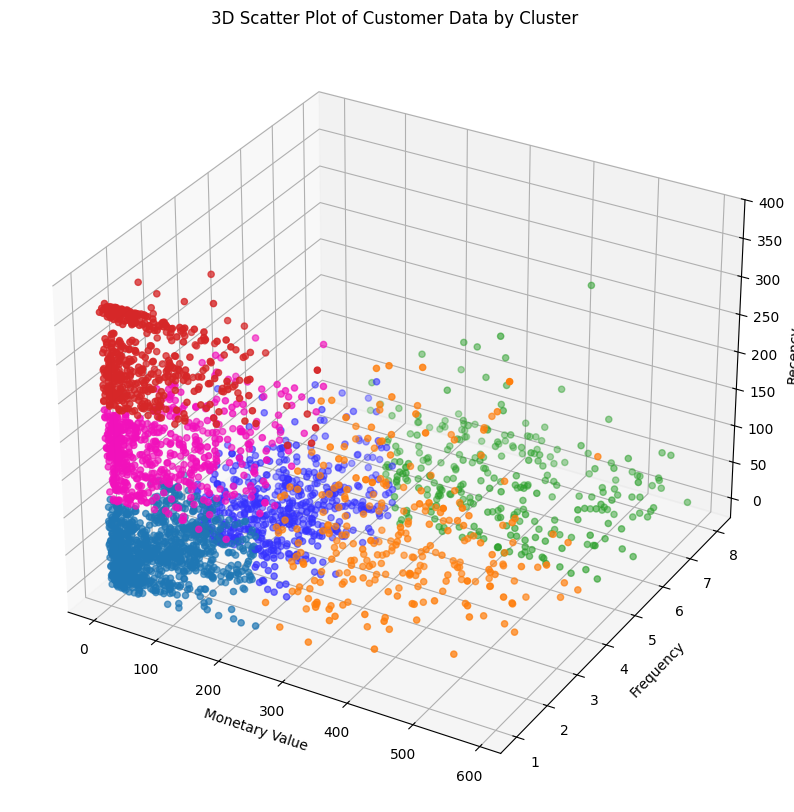

In [48]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728',# Red
                  4:'#3633ff',
                  5:'#f111bb'
}

colors = non_outliers_df['Clusters'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

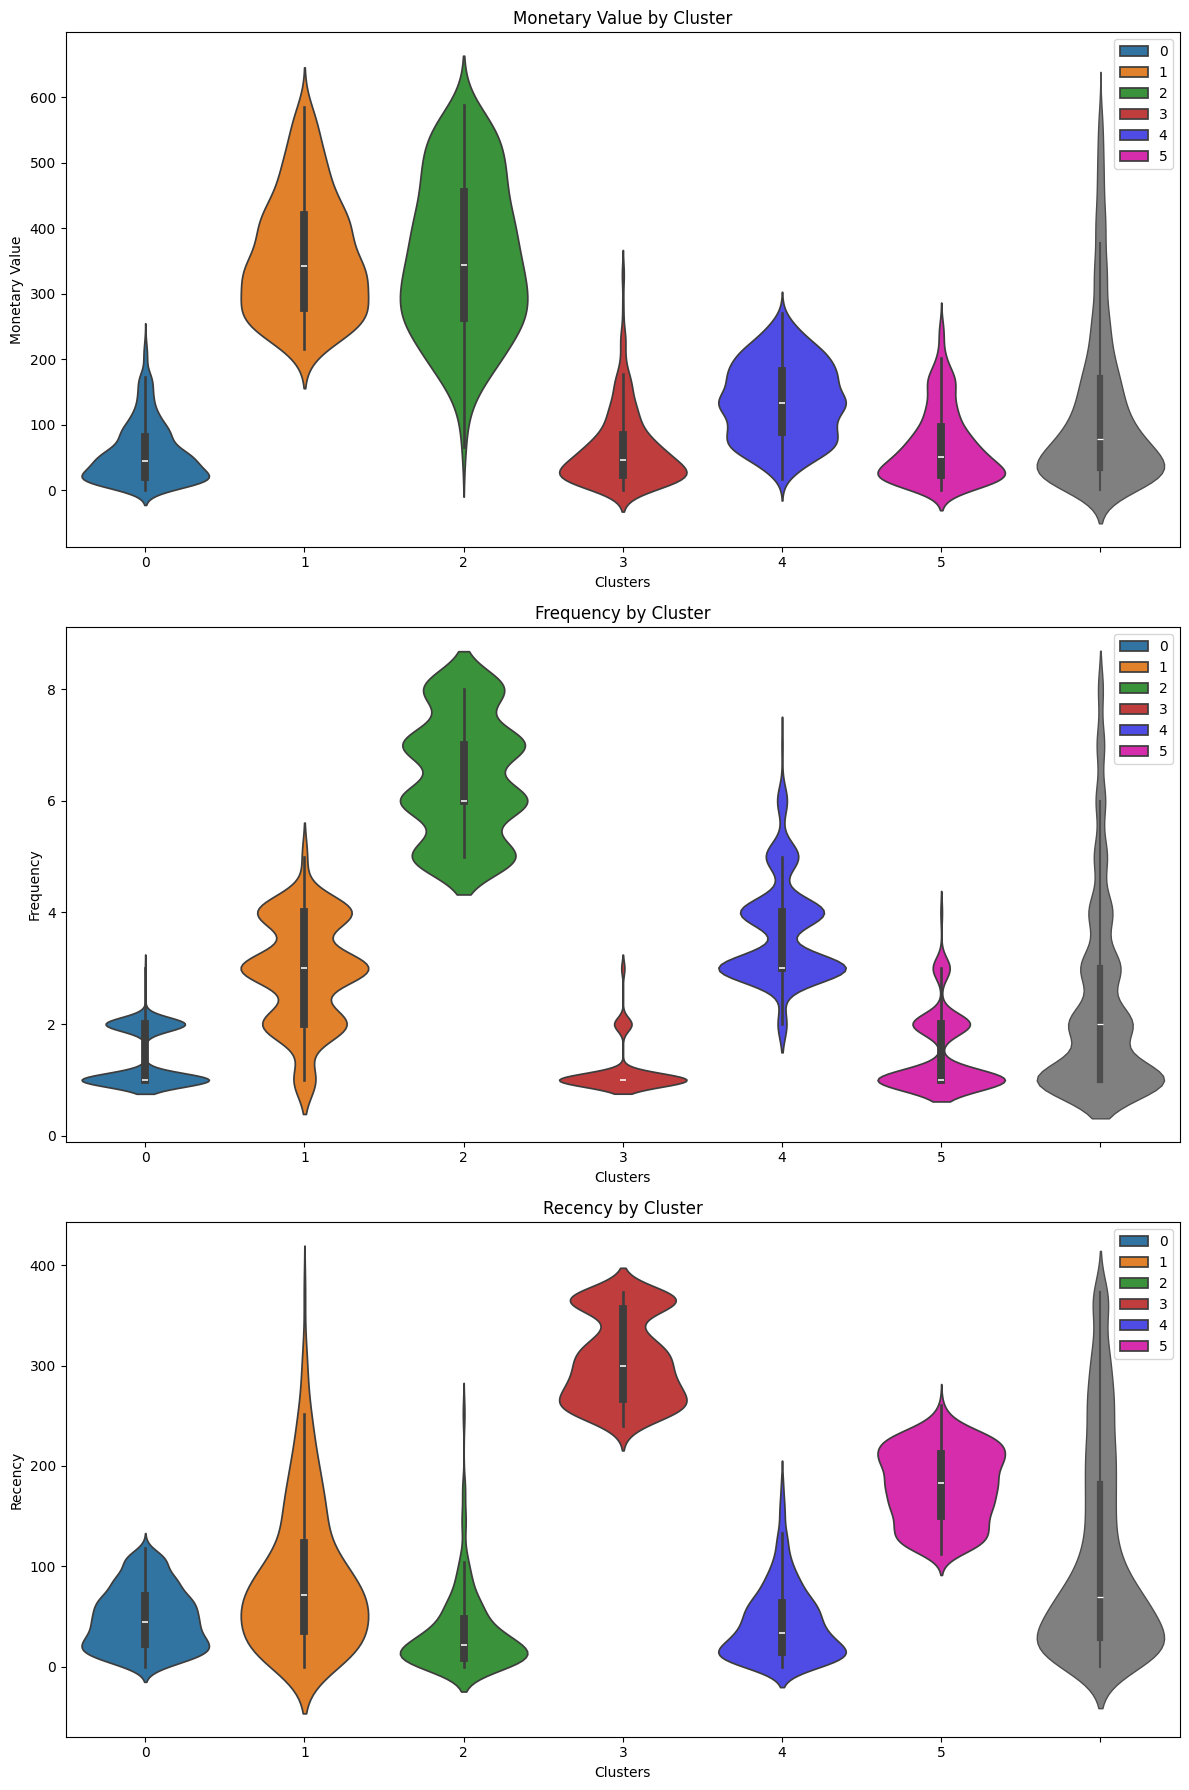

In [49]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Clusters'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Clusters'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Clusters'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

 Light Blue: **""Dormant Low-Value""** : Low monetary value, low frequency, and least recent activity indicate these are inactive or dormant customers with minimal engagement.


Yellow: **"Mid-Tier Consistent"**

Medium-high monetary value, medium frequency, and a mix of recency suggest these customers are consistent and balanced in their spending behavior.

Green: **"High-Value Loyalists"**

Medium-high monetary value, high frequency, and a mix of old and new recency indicate these are loyal, high-value customers who engage frequently.

Red: **"Recent Low-Spenders"**

Low monetary value, low frequency, but very recent activity suggests these are newer or re-engaged customers with low spending so far.

Dark Blue: **"Steady but Distant"**

Low-medium monetary value, medium frequency, and least recent activity indicate these are steady but less engaged customers with moderate value.

Pink:**"Occasional Engagers"**

Low-medium monetary value, low frequency, and medium recency suggest these customers spend occasionally but are not highly engaged.





In [57]:
overlap_indices=monetary_outliers_df.index.intersection(frequency_outliers_df.index)
monetary_only_outliers=monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlap_indices)
monetary_and_frequncy_outliers=monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Clusters"]=-1
frequency_only_outliers["Clusters"]=-2
monetary_and_frequncy_outliers["Clusters"]=-3

outlier_clusters_df=pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequncy_outliers])
outlier_clusters_df



,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
5,12356.00,1033.67,3,2010-11-24 12:24:00,15,-1
6,12357.00,761.72,1,2010-11-16 10:05:00,23,-1
7,12358.00,1337.40,2,2010-11-29 10:56:00,10,-1
20,12380.00,651.00,3,2010-08-31 14:54:00,100,-1
33,12409.00,1175.20,2,2010-10-15 10:24:00,55,-1
...,...,...,...,...,...,...
3574,18172.00,1498.20,12,2010-10-27 12:30:00,43,-3
3606,18223.00,883.14,10,2010-11-17 12:20:00,22,-3
3607,18225.00,1607.81,11,2010-11-18 15:29:00,21,-3
3608,18226.00,1874.02,15,2010-11-26 15:51:00,13,-3


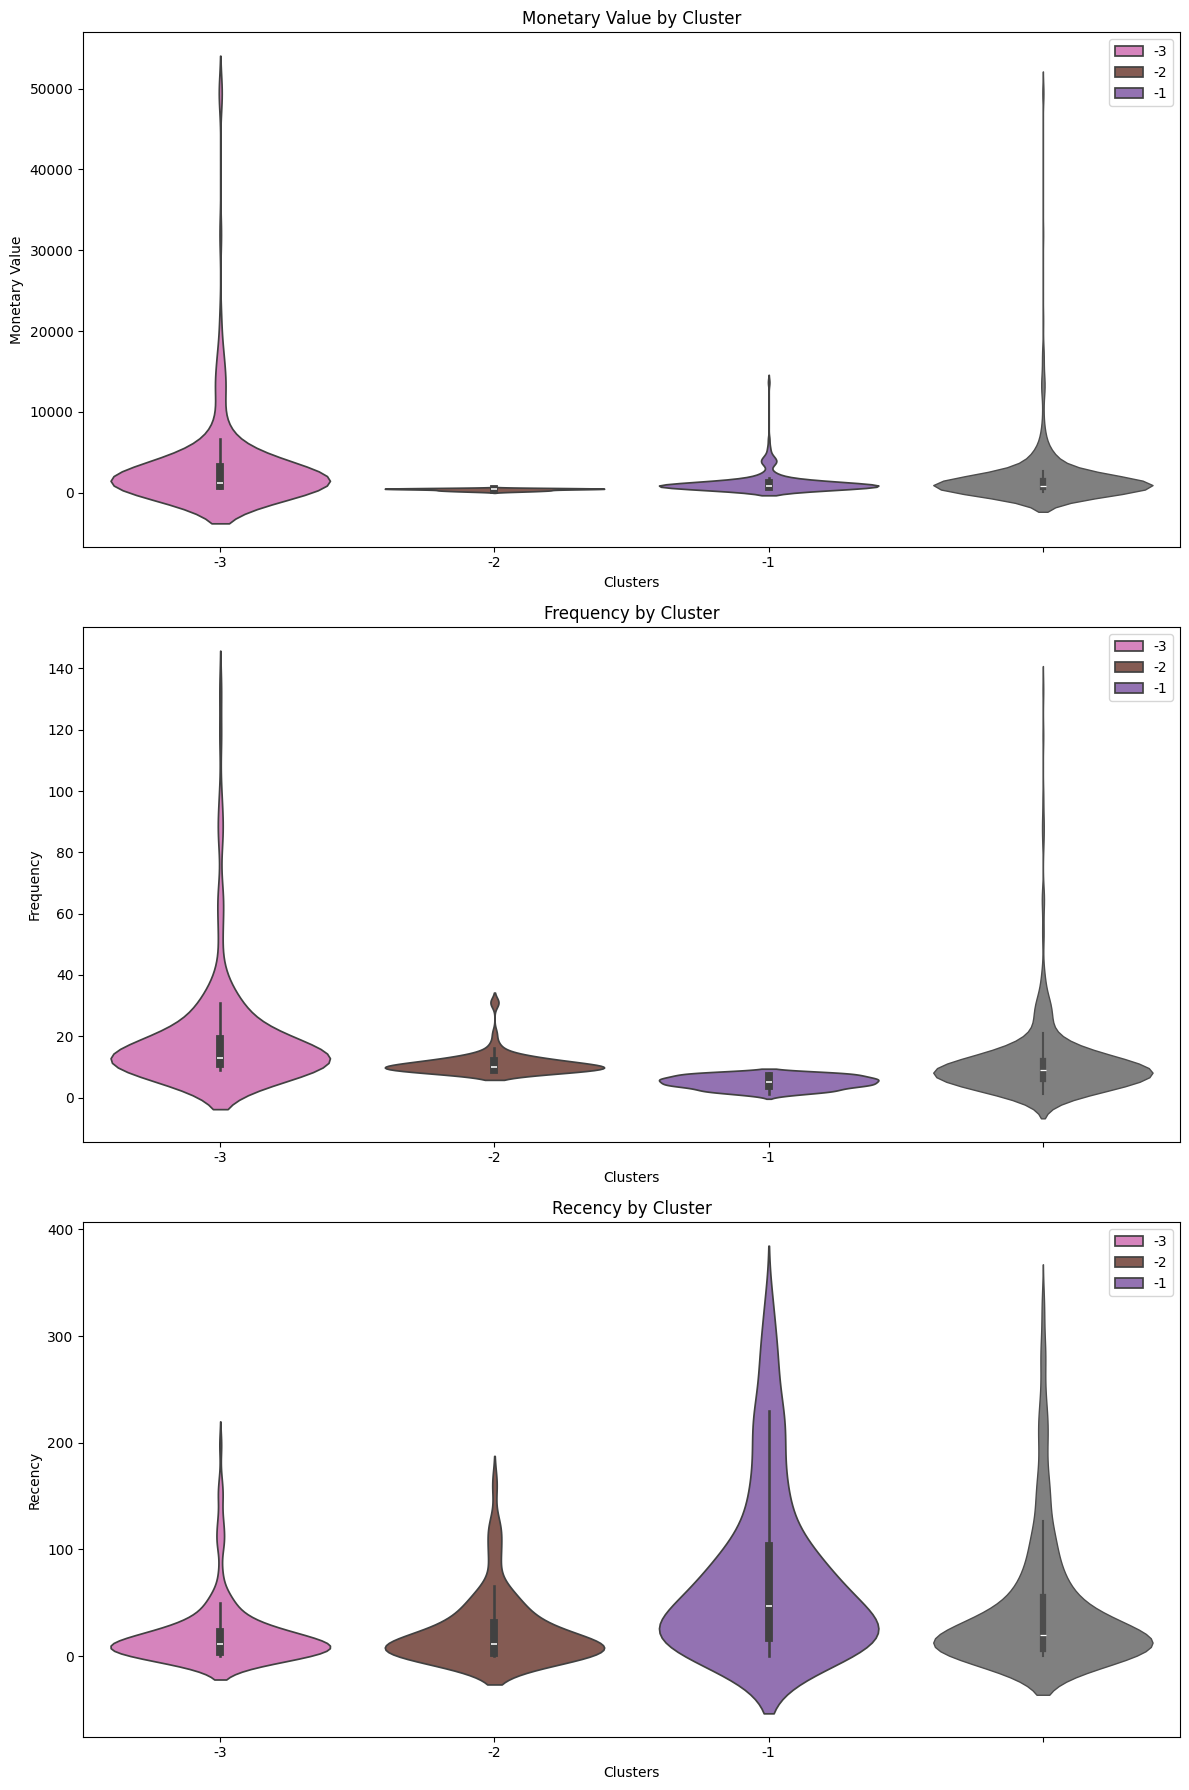

In [58]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Clusters'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Clusters"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Clusters'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Clusters"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Clusters'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Clusters"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [59]:
cluster_labels = {
    0: "Dormant Low-Value",
    1: "Mid-Tier Consistent",
    2: "High-Value Loyalists",
    3: "Recent Low-Spenders",
    4:"Steady but Distant",
    5:"Occasional Engagers",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [60]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.00,25.34,2,2010-06-28 13:53:00,164,5
1,12347.00,356.45,2,2010-12-07 14:57:00,2,1
2,12349.00,274.50,2,2010-10-28 08:23:00,42,1
3,12352.00,11.40,1,2010-11-29 10:07:00,10,0
4,12355.00,158.80,1,2010-05-21 11:59:00,202,5
...,...,...,...,...,...,...
3574,18172.00,1498.20,12,2010-10-27 12:30:00,43,-3
3606,18223.00,883.14,10,2010-11-17 12:20:00,22,-3
3607,18225.00,1607.81,11,2010-11-18 15:29:00,21,-3
3608,18226.00,1874.02,15,2010-11-26 15:51:00,13,-3


In [62]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Clusters"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters,ClusterLabel
0,12346.00,25.34,2,2010-06-28 13:53:00,164,5,Occasional Engagers
1,12347.00,356.45,2,2010-12-07 14:57:00,2,1,Mid-Tier Consistent
2,12349.00,274.50,2,2010-10-28 08:23:00,42,1,Mid-Tier Consistent
3,12352.00,11.40,1,2010-11-29 10:07:00,10,0,Dormant Low-Value
4,12355.00,158.80,1,2010-05-21 11:59:00,202,5,Occasional Engagers
...,...,...,...,...,...,...,...
3574,18172.00,1498.20,12,2010-10-27 12:30:00,43,-3,DELIGHT
3606,18223.00,883.14,10,2010-11-17 12:20:00,22,-3,DELIGHT
3607,18225.00,1607.81,11,2010-11-18 15:29:00,21,-3,DELIGHT
3608,18226.00,1874.02,15,2010-11-26 15:51:00,13,-3,DELIGHT


#Visualization

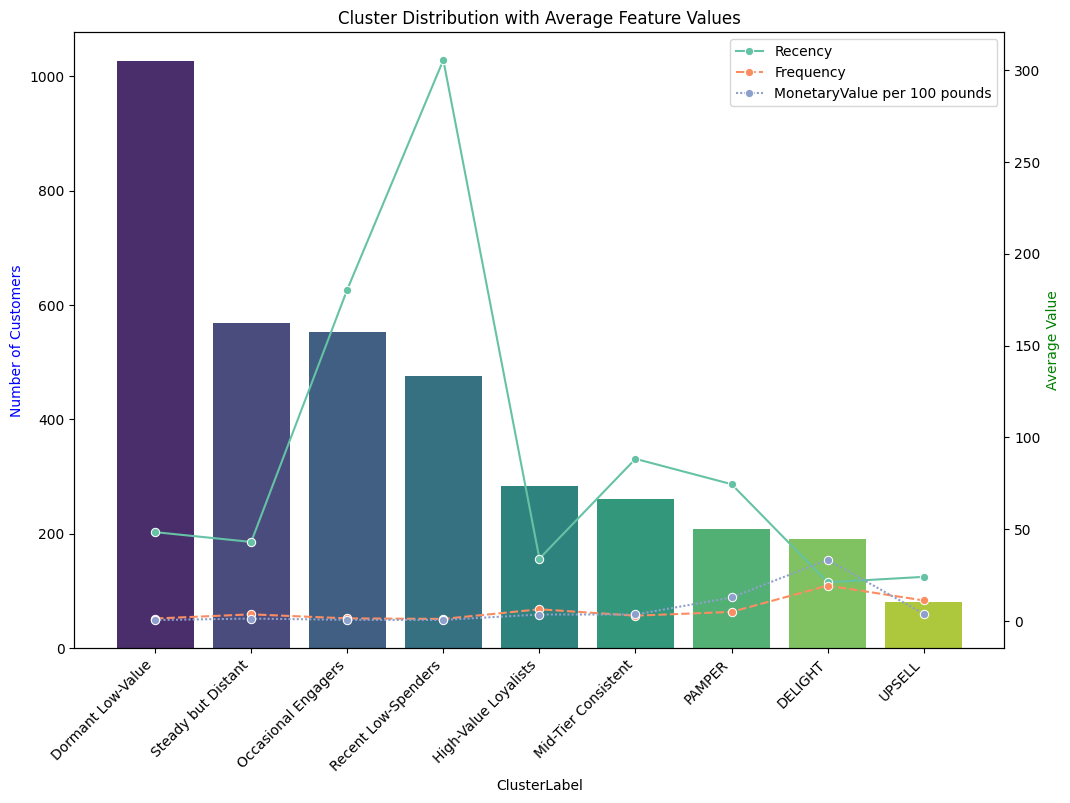

In [66]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
)

ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()